In [1]:
import pandas as pd
cars = pd.read_csv ("cars.csv",error_bad_lines=False)

In [2]:
cars.head()

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://abilene.craigslist.org/cto/d/abilene-2...,"abilene, TX",https://abilene.craigslist.org,3500,2006.0,chevrolet,NaN,excellent,6 cylinders,gas,...,automatic,NaN,NaN,NaN,NaN,white,https://images.craigslist.org/00e0e_iduGuXQ3P0...,"2006 Chevy Equinox with only 113,000 miles. V6...",32.401556,-99.884713
1,https://abilene.craigslist.org/cto/d/austin-20...,"abilene, TX",https://abilene.craigslist.org,3399,2002.0,lexus,es300,good,6 cylinders,gas,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00000_fJJiWIlx3z...,Nice and very reliable luxury family sedan. A...,30.120400,-97.743300
2,https://abilene.craigslist.org/cto/d/aspermont...,"abilene, TX",https://abilene.craigslist.org,9000,2009.0,chevrolet,suburban lt2,good,8 cylinders,gas,...,automatic,1GFNC26099R211276,rwd,full-size,SUV,white,https://images.craigslist.org/00909_5P6f1E6zHl...,2WD 1/2 ton\nLeather Captains Chairs\nIn good ...,33.130100,-100.234400
3,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,31999,2012.0,ram,2500,NaN,NaN,diesel,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_24XW8uhLYP...,www.GETADIESEL.com\n2012 RAM 2500 SLT 4X4 MEGA...,30.648368,-97.862949
4,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,16990,2003.0,ram,3500,NaN,NaN,diesel,...,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_H1UKTJ4sTI...,www.GETADIESEL.com\n2003 DODGE RAM 3500 LARAMI...,30.648516,-97.862434


In [3]:
cars =cars.dropna(thresh=len(cars)/3, axis=1)

In [59]:
dcars=cars.drop(['url','city_url','condition','drive','image_url', 'long', 'lat', 'VIN', 'desc'], axis=1 )

In [92]:
dcars['odometer']=cars['odometer']

In [60]:
dcars

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color
0,"abilene, TX",3500,2006.0,chevrolet,NaN,6 cylinders,gas,113000.0,clean,automatic,NaN,NaN,white
1,"abilene, TX",3399,2002.0,lexus,es300,6 cylinders,gas,140000.0,clean,automatic,NaN,NaN,NaN
2,"abilene, TX",9000,2009.0,chevrolet,suburban lt2,8 cylinders,gas,217743.0,clean,automatic,full-size,SUV,white
3,"abilene, TX",31999,2012.0,ram,2500,NaN,diesel,NaN,clean,automatic,NaN,NaN,NaN
4,"abilene, TX",16990,2003.0,ram,3500,NaN,diesel,NaN,clean,manual,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545932,zanesville / cambridge,12995,2006.0,gmc,sierra 2500hd,8 cylinders,diesel,188416.0,clean,automatic,full-size,truck,white
545933,zanesville / cambridge,6995,2006.0,ram,1500,8 cylinders,gas,125357.0,clean,automatic,full-size,truck,red
545934,zanesville / cambridge,1500,2005.0,chevrolet,cobalt,NaN,gas,NaN,clean,manual,NaN,NaN,NaN
545935,zanesville / cambridge,6995,2001.0,ford,f150 xlt,6 cylinders,gas,63000.0,clean,automatic,NaN,NaN,red


In [8]:
corr_matrix = dcars.corr()
corr_matrix

,price,year,odometer
price,1.000000,-0.004086,0.000595
year,-0.004086,1.000000,-0.102091
odometer,0.000595,-0.102091,1.000000


In [61]:
dcars['price']= dcars['price'].div(1000)

In [93]:
dcars['price']= dcars['price'][dcars['price'].between(dcars['price'].quantile(.01), dcars['price'].quantile(.99))] 
dcars['odometer']= dcars['odometer'][dcars['odometer'].between(dcars['odometer'].quantile(.01), dcars['odometer'].quantile(.99))] 
# without outliers# without outliers

In [12]:
import matplotlib.pyplot as plt

In [25]:
ford = dcars.loc[dcars['manufacturer']=='ford']
ford['price']= ford['price'].sort_values(ascending=True)

/Users/jaeheukjung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


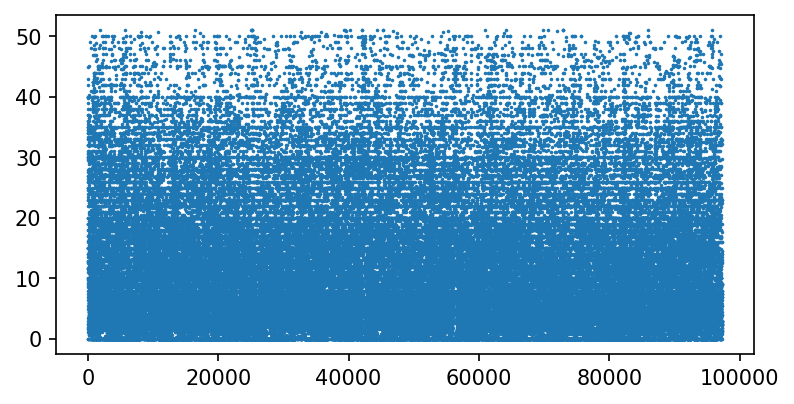

In [26]:
plt.figure(figsize = (6,3), dpi= 150)
plt.scatter(range(0,len(ford['price'])), ford['price'], s= .5)

In [22]:
chevrolet = dcars.loc[dcars['manufacturer']=='chevrolet']

In [46]:
import numpy as np
def normalize(x):
    x = np.asarray(x)
    return (x - x.min()) / (np.ptp(x))

In [70]:
dcars

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color
0,0.641900,3.500,0.203906,0.171308,NaN,0.322034,0.0,113000.0,0.553128,0.216354,NaN,NaN,1.000000
1,0.641900,3.399,0.137238,0.182176,es300,0.322034,0.0,140000.0,0.553128,0.216354,NaN,NaN,NaN
2,0.641900,9.000,0.274299,0.171308,suburban lt2,1.000000,0.0,217743.0,0.553128,0.216354,1.0,0.378001,1.000000
3,0.641900,31.999,0.423518,0.429289,2500,NaN,1.0,NaN,0.553128,0.216354,NaN,NaN,NaN
4,0.641900,16.990,0.154042,0.429289,3500,NaN,1.0,NaN,0.553128,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545932,0.249866,12.995,0.203906,0.239234,sierra 2500hd,1.000000,1.0,188416.0,0.553128,0.216354,1.0,0.692213,1.000000
545933,0.249866,6.995,0.203906,0.429289,1500,1.000000,0.0,125357.0,0.553128,0.216354,1.0,0.692213,0.565672
545934,0.249866,1.500,0.190180,0.171308,cobalt,NaN,0.0,NaN,0.553128,0.000000,NaN,NaN,NaN
545935,0.249866,6.995,0.137042,0.184758,f150 xlt,0.322034,0.0,63000.0,0.553128,0.216354,NaN,NaN,0.565672


In [64]:
def classifier_formula(column):
    names = []
    classifier = []
    normalized =[]
    for i in dcars[column].unique():
        names.append(i)
        names = [y for y in names if y==y]
        i = dcars.loc[dcars[column]==i]
        classifier.append(i['price'].median())
    print(names)
    print(len(names))
    classifier = [j for j in classifier if j==j]
    print((classifier))
    print(len(classifier))
    normalized = (normalize(classifier))
    for x in range(0, len(names)):
        dcars[column]=dcars[column].replace({names[x]:normalized[x]})

In [39]:
column_list = ['city', 'year', 'manufacturer', 'cylinders', 'fuel',
        'title_status', 'transmission', 'size', 'type',
       'paint_color']

In [ ]:
for i in column_list:
    classifier_formula(i)

In [391]:
dcars

,city,year,manufacturer,cylinders,title_status,transmission,type,paint_color,odometer_0,odometer_0,...,fuel_1.0,mk_0.0,mk_1.0,mk_2.0,mk_3.0,s_0.0,s_0.19832067173130763,s_0.20031987205117963,s_1.0,price
0,0.641900,0.207984,0.171308,0.322034,0.553128,0.216354,0.150123,1.000000,0,0,...,0,0,1,0,0,0,0,0,1,3.500
1,0.641900,0.139983,0.182176,0.322034,0.553128,0.216354,0.150123,1.000000,0,0,...,0,0,0,0,1,0,0,0,1,3.399
2,0.641900,0.279746,0.171308,1.000000,0.553128,0.216354,0.378001,1.000000,0,0,...,0,1,0,0,0,0,0,0,1,9.000
3,0.641900,0.431709,0.429289,0.322034,0.553128,0.216354,0.150123,1.000000,0,0,...,1,0,1,0,0,0,0,0,1,31.999
4,0.641900,0.156283,0.429289,0.322034,0.553128,0.000000,0.150123,1.000000,0,0,...,1,0,0,1,0,0,0,0,1,16.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545932,0.249866,0.207984,0.239234,1.000000,0.553128,0.216354,0.692213,1.000000,0,0,...,1,0,1,0,0,0,0,0,1,12.995
545933,0.249866,0.207984,0.429289,1.000000,0.553128,0.216354,0.692213,0.565672,0,0,...,0,0,1,0,0,0,0,0,1,6.995
545934,0.249866,0.191984,0.171308,0.322034,0.553128,0.000000,0.150123,1.000000,0,0,...,0,0,1,0,0,0,0,0,1,1.500
545935,0.249866,0.139783,0.184758,0.322034,0.553128,0.216354,0.150123,0.565672,1,1,...,0,0,0,0,1,0,0,0,1,6.995


In [98]:
from scikit_learn 
OneHotEncoder().fit_transform(df)

In [97]:
bins = [0,7.00790000e+04, 1.40131000e+05,2.10183000e+05, np.inf]
names = [0, 1, 2, 3]
dcars_1['odometer'] = pd.cut(dcars_1['odometer'], bins, labels=names)
dcars_1.head(10)


,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color
0,0.6419,3.500,0.203906,0.171308,NaN,0.322034,0.0,1,0.553128,0.216354,NaN,NaN,1.000000
1,0.6419,3.399,0.137238,0.182176,es300,0.322034,0.0,1,0.553128,0.216354,NaN,NaN,NaN
2,0.6419,9.000,0.274299,0.171308,suburban lt2,1.000000,0.0,3,0.553128,0.216354,1.0,0.378001,1.000000
3,0.6419,31.999,0.423518,0.429289,2500,NaN,1.0,NaN,0.553128,0.216354,NaN,NaN,NaN
4,0.6419,16.990,0.154042,0.429289,3500,NaN,1.0,NaN,0.553128,0.000000,NaN,NaN,NaN
5,0.6419,6.000,0.137238,0.239234,sierra 1500,1.000000,0.0,2,0.553128,0.216354,NaN,1.000000,1.000000
6,0.6419,7.000,0.235083,0.011004,NaN,0.236441,0.0,NaN,0.553128,0.216354,0.0,0.307479,0.565672
7,0.6419,37.000,0.423518,0.171308,3500,1.000000,1.0,2,0.553128,0.216354,1.0,1.000000,0.417761
8,0.6419,3.700,0.154042,NaN,F150,1.000000,0.0,3,0.553128,0.216354,NaN,1.000000,0.417761
9,0.6419,19.950,0.482343,0.184758,f-250,1.000000,0.0,1,0.553128,0.216354,1.0,1.000000,1.000000


In [99]:
dcars

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color
0,0.641900,3.500,0.203906,0.171308,NaN,0.322034,0.0,1,0.553128,0.216354,NaN,NaN,1.000000
1,0.641900,3.399,0.137238,0.182176,es300,0.322034,0.0,1,0.553128,0.216354,NaN,NaN,NaN
2,0.641900,9.000,0.274299,0.171308,suburban lt2,1.000000,0.0,3,0.553128,0.216354,1.0,0.378001,1.000000
3,0.641900,31.999,0.423518,0.429289,2500,NaN,1.0,NaN,0.553128,0.216354,NaN,NaN,NaN
4,0.641900,16.990,0.154042,0.429289,3500,NaN,1.0,NaN,0.553128,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545932,0.249866,12.995,0.203906,0.239234,sierra 2500hd,1.000000,1.0,2,0.553128,0.216354,1.0,0.692213,1.000000
545933,0.249866,6.995,0.203906,0.429289,1500,1.000000,0.0,1,0.553128,0.216354,1.0,0.692213,0.565672
545934,0.249866,1.500,0.190180,0.171308,cobalt,NaN,0.0,NaN,0.553128,0.000000,NaN,NaN,NaN
545935,0.249866,6.995,0.137042,0.184758,f150 xlt,0.322034,0.0,0,0.553128,0.216354,NaN,NaN,0.565672


(array([154533., 114156.,  80655.,  61748.,  42244.,  29882.,  22684.,
         15392.,   8306.,   5499.]),
 array([ 0.    ,  4.3988,  8.7976, 13.1964, 17.5952, 21.994 , 26.3928,
        30.7916, 35.1904, 39.5892, 43.988 ]),
 <a list of 10 Patch objects>)

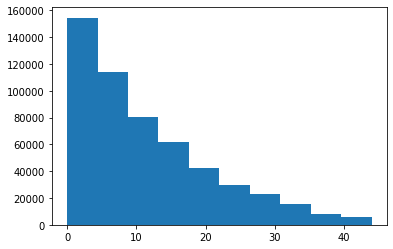

In [101]:
plt.hist(dcars['price']) 

(array([40721., 57872., 50020., 57914., 61084., 54668., 42023., 29088.,
        17509.,  8937.,  4836.,  2537.]),
 array([2.70000000e+01, 2.33776667e+04, 4.67283333e+04, 7.00790000e+04,
        9.34296667e+04, 1.16780333e+05, 1.40131000e+05, 1.63481667e+05,
        1.86832333e+05, 2.10183000e+05, 2.33533667e+05, 2.56884333e+05,
        2.80235000e+05]),
 <a list of 12 Patch objects>)

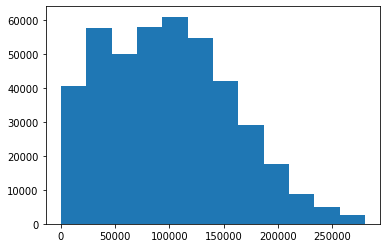

In [79]:
plt.hist(dcars['odometer'], bins = 12, rwidth = True)

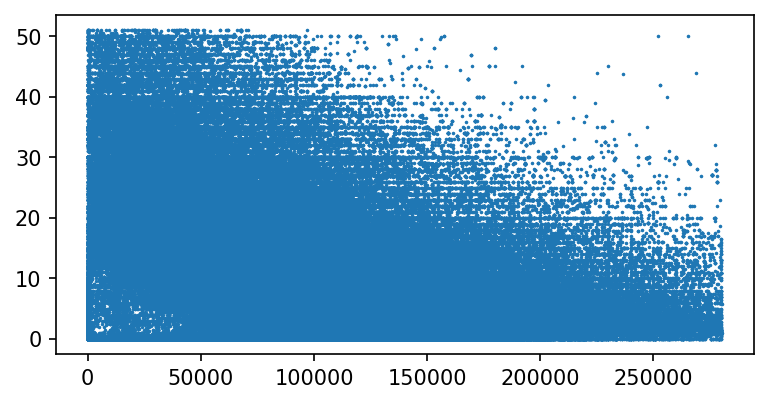

In [69]:
plt.figure (figsize = (6,3), dpi = 150)
plt.scatter(dcars['odometer'],dcars['price'], s=.5)

In [ ]:
names = []
classifier = []
normalized =[]
for i in dcars['make'].unique():
    names.append(i)
    names = [y for y in names if y==y]
    i = dcars.loc[dcars['make']==i]
    classifier.append(determine(i['price'].median()))
    print(names)
    print(len(names))
    classifier = [j for j in classifier if j==j]
    print((classifier))
for x in range(0, len(names)):
    dcars['make']=dcars['make'].replace({names[x]:classifier[x]})    

In [114]:
def determine(x):
    if (x< 4.4):
       return 0
    elif (x<13.2):
        return 1
    elif(x<22):
        return 2
    else:
        return 3

In [118]:
dcars

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color
0,0.641900,3.500,0.203906,0.171308,NaN,0.322034,0.0,1,0.553128,0.216354,NaN,NaN,1.000000
1,0.641900,3.399,0.137238,0.182176,3.0,0.322034,0.0,1,0.553128,0.216354,NaN,NaN,NaN
2,0.641900,9.000,0.274299,0.171308,0.0,1.000000,0.0,3,0.553128,0.216354,1.0,0.378001,1.000000
3,0.641900,31.999,0.423518,0.429289,1.0,NaN,1.0,NaN,0.553128,0.216354,NaN,NaN,NaN
4,0.641900,16.990,0.154042,0.429289,2.0,NaN,1.0,NaN,0.553128,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545932,0.249866,12.995,0.203906,0.239234,1.0,1.000000,1.0,2,0.553128,0.216354,1.0,0.692213,1.000000
545933,0.249866,6.995,0.203906,0.429289,1.0,1.000000,0.0,1,0.553128,0.216354,1.0,0.692213,0.565672
545934,0.249866,1.500,0.190180,0.171308,1.0,NaN,0.0,NaN,0.553128,0.000000,NaN,NaN,NaN
545935,0.249866,6.995,0.137042,0.184758,3.0,0.322034,0.0,0,0.553128,0.216354,NaN,NaN,0.565672


In [135]:
dcars

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color
0,0.641900,3.500,0.207984,0.171308,NaN,0.322034,0.0,1,0.553128,0.216354,NaN,NaN,1.000000
1,0.641900,3.399,0.139983,0.182176,3.0,0.322034,0.0,1,0.553128,0.216354,NaN,NaN,NaN
2,0.641900,9.000,0.279746,0.171308,0.0,1.000000,0.0,3,0.553128,0.216354,1.0,0.378001,1.000000
3,0.641900,31.999,0.431709,0.429289,1.0,NaN,1.0,NaN,0.553128,0.216354,NaN,NaN,NaN
4,0.641900,16.990,0.156283,0.429289,2.0,NaN,1.0,NaN,0.553128,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545932,0.249866,12.995,0.207984,0.239234,1.0,1.000000,1.0,2,0.553128,0.216354,1.0,0.692213,1.000000
545933,0.249866,6.995,0.207984,0.429289,1.0,1.000000,0.0,1,0.553128,0.216354,1.0,0.692213,0.565672
545934,0.249866,1.500,0.191984,0.171308,1.0,NaN,0.0,NaN,0.553128,0.000000,NaN,NaN,NaN
545935,0.249866,6.995,0.139783,0.184758,3.0,0.322034,0.0,0,0.553128,0.216354,NaN,NaN,0.565672


In [137]:
export_csv = dcars.to_csv (r'/Users/jaeheukjung/Desktopexport_dataframe.csv', index = None, header=True)

In [133]:
dcars['year'] = cars['year']

In [124]:
normalize_city = normalize(city_classifier)

In [217]:
column_list = ['city', 'manufacturer', 'fuel', 'condition','cylinders','transmission', 'drive', 'size', 'type', 'paint_color']

In [138]:
def replaceNan(column):
    dcars[column].fillna(dcars[column].mode()[0], inplace=True)

In [142]:
fill_list =['manufacturer', 'make', 'cylinders','fuel', 'odometer','title_status','transmission','size','type','paint_color']

In [143]:
for i in fill_list:
    replaceNan(i)

In [144]:
dcars.isnull().sum(axis = 0)

city                0
price           10838
year                0
manufacturer        0
make                0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
size                0
type                0
paint_color         0
dtype: int64

In [145]:
dcars['price'].dropna()

0          3.500
1          3.399
2          9.000
3         31.999
4         16.990
           ...  
545932    12.995
545933     6.995
545934     1.500
545935     6.995
545936     5.200
Name: price, Length: 535099, dtype: float64

In [146]:
dcars

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color
0,0.641900,3.500,0.207984,0.171308,1.0,0.322034,0.0,1,0.553128,0.216354,1.0,0.150123,1.000000
1,0.641900,3.399,0.139983,0.182176,3.0,0.322034,0.0,1,0.553128,0.216354,1.0,0.150123,1.000000
2,0.641900,9.000,0.279746,0.171308,0.0,1.000000,0.0,3,0.553128,0.216354,1.0,0.378001,1.000000
3,0.641900,31.999,0.431709,0.429289,1.0,0.322034,1.0,1,0.553128,0.216354,1.0,0.150123,1.000000
4,0.641900,16.990,0.156283,0.429289,2.0,0.322034,1.0,1,0.553128,0.000000,1.0,0.150123,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545932,0.249866,12.995,0.207984,0.239234,1.0,1.000000,1.0,2,0.553128,0.216354,1.0,0.692213,1.000000
545933,0.249866,6.995,0.207984,0.429289,1.0,1.000000,0.0,1,0.553128,0.216354,1.0,0.692213,0.565672
545934,0.249866,1.500,0.191984,0.171308,1.0,0.322034,0.0,1,0.553128,0.000000,1.0,0.150123,1.000000
545935,0.249866,6.995,0.139783,0.184758,3.0,0.322034,0.0,0,0.553128,0.216354,1.0,0.150123,0.565672


In [219]:
for i in column_list:
    classifier_formula(i)

['abilene, TX', 'akron / canton', 'albany, GA', 'albany, NY', 'albuquerque', 'altoona-johnstown', 'amarillo, TX', 'ames, IA', 'anchorage / mat-su', 'annapolis, MD', 'ann arbor, MI', 'appleton-oshkosh-FDL', 'asheville, NC', 'ashtabula, OH', 'athens, GA', 'athens, OH', 'atlanta, GA', 'auburn, AL', 'augusta, GA', 'austin, TX', 'bakersfield, CA', 'baltimore, MD', 'baton rouge', 'battle creek, MI', 'beaumont / port arthur', 'bellingham, WA', 'bemidji, MN', 'bend, OR', 'billings, MT', 'binghamton, NY', 'birmingham, AL', 'bismarck, ND', 'bloomington, IN', 'bloomington-normal', 'boise, ID', 'boone, NC', 'boston', 'boulder, CO', 'bowling green, KY', 'bozeman, MT', 'brainerd, MN', 'brownsville, TX', 'brunswick, GA', 'buffalo, NY', 'butte, MT', 'cape cod / islands', 'catskills', 'cedar rapids, IA', 'central louisiana', 'central michigan', 'central NJ', 'champaign urbana', 'charleston, SC', 'charleston, WV', 'charlotte, NC', 'charlottesville, VA', 'chattanooga, TN', 'chautauqua, NY', 'chicago', 'c

In [49]:
normalize(dcars['odometer'])

array([nan, nan, nan, ..., nan, nan, nan])

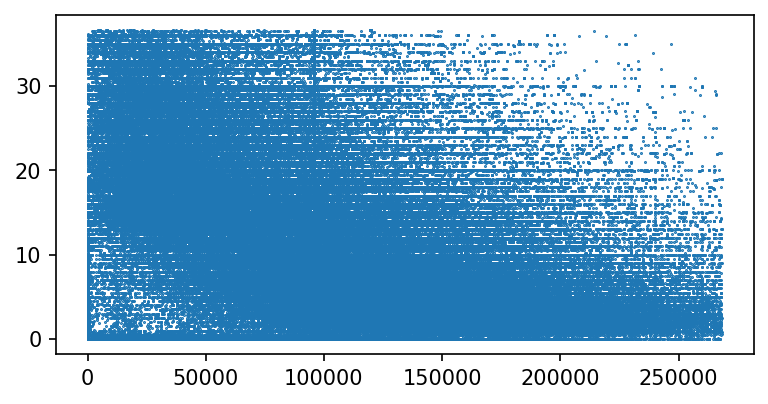

In [212]:
plt.figure(figsize = (6,3), dpi = 150)
plt.scatter(dcars['odometer'], dcars['price'], s = .2)

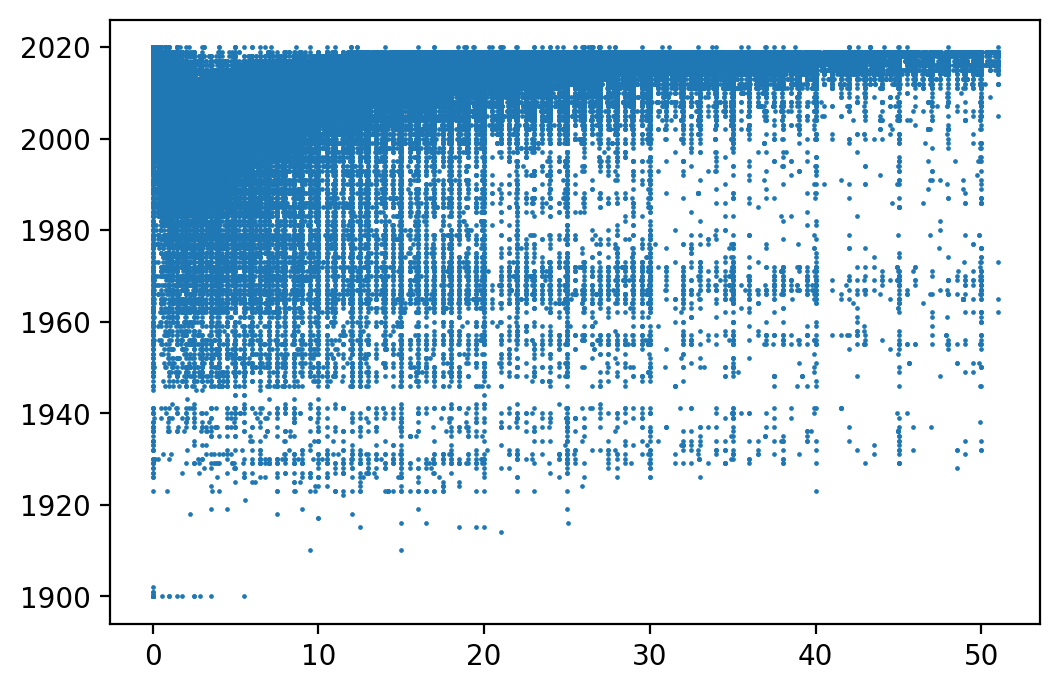

In [227]:
plt.figure(figsize = (6,4), dpi= 200)
plt.scatter(dcars['price'], dcars['year'], s = .5)

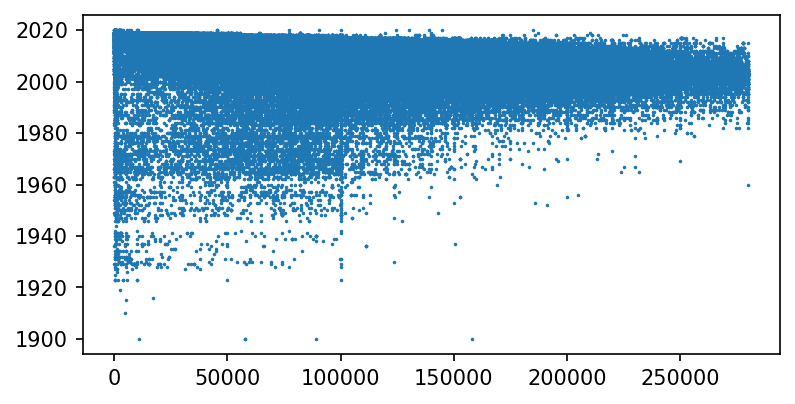

In [230]:
plt.figure(figsize = (6,3), dpi= 150)
plt.scatter(dcars['odometer'], dcars['year'], s = .5)

In [219]:
dcars.columns

Index(['city', 'year', 'manufacturer', 'cylinders', 'title_status',
       'transmission', 'type', 'paint_color', 'price', 'odometer_0',
       'odometer_1', 'odometer_2', 'odometer_3', 'odometer_0', 'odometer_1',
       'odometer_2', 'odometer_3', 'odometer_0', 'odometer_1', 'odometer_2',
       'odometer_3', 'fuel_0.0', 'fuel_0.0466450717260528',
       'fuel_0.29199444701527055', 'fuel_0.4169366034243406', 'fuel_1.0',
       'mk_0.0', 'mk_1.0', 'mk_2.0', 'mk_3.0', 's_0.0',
       's_0.19832067173130763', 's_0.20031987205117963', 's_1.0'],
      dtype='object')

In [220]:
columns = ['city', 'year', 'manufacturer', 'cylinders', 'title_status',
       'transmission', 'type', 'paint_color', 'odometer_0',
       'odometer_1', 'odometer_2', 'odometer_3', 'odometer_0', 'odometer_1',
       'odometer_2', 'odometer_3', 'odometer_0', 'odometer_1', 'odometer_2',
       'odometer_3', 'fuel_0.0', 'fuel_0.0466450717260528',
       'fuel_0.29199444701527055', 'fuel_0.4169366034243406', 'fuel_1.0',
       'mk_0.0', 'mk_1.0', 'mk_2.0', 'mk_3.0', 's_0.0',
       's_0.19832067173130763', 's_0.20031987205117963', 's_1.0', 'price']
dcars = dcars.ix[:,columns]

/Users/jaeheukjung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/jaeheukjung/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [217]:
dcars = pd.concat([dcars,pd.get_dummies(dcars['fuel'], prefix='fuel')],axis=1)
dcars = pd.concat([dcars,pd.get_dummies(dcars['make'], prefix = 'mk')], axis = 1)
dcars = pd.concat([dcars,pd.get_dummies(dcars['size'], prefix = 's')], axis =1)
# now drop the original 'country' column (you don't need it anymore)
dcars.drop(['fuel'],axis=1, inplace=True)
dcars.drop(['make'],axis=1, inplace=True)
dcars.drop(['size'],axis=1, inplace=True)

In [221]:
dcars

,city,year,manufacturer,cylinders,title_status,transmission,type,paint_color,odometer_0,odometer_0,...,fuel_1.0,mk_0.0,mk_1.0,mk_2.0,mk_3.0,s_0.0,s_0.19832067173130763,s_0.20031987205117963,s_1.0,price
0,0.641900,0.207984,0.171308,0.322034,0.553128,0.216354,0.150123,1.000000,0,0,...,0,0,1,0,0,0,0,0,1,3.500
1,0.641900,0.139983,0.182176,0.322034,0.553128,0.216354,0.150123,1.000000,0,0,...,0,0,0,0,1,0,0,0,1,3.399
2,0.641900,0.279746,0.171308,1.000000,0.553128,0.216354,0.378001,1.000000,0,0,...,0,1,0,0,0,0,0,0,1,9.000
3,0.641900,0.431709,0.429289,0.322034,0.553128,0.216354,0.150123,1.000000,0,0,...,1,0,1,0,0,0,0,0,1,31.999
4,0.641900,0.156283,0.429289,0.322034,0.553128,0.000000,0.150123,1.000000,0,0,...,1,0,0,1,0,0,0,0,1,16.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545932,0.249866,0.207984,0.239234,1.000000,0.553128,0.216354,0.692213,1.000000,0,0,...,1,0,1,0,0,0,0,0,1,12.995
545933,0.249866,0.207984,0.429289,1.000000,0.553128,0.216354,0.692213,0.565672,0,0,...,0,0,1,0,0,0,0,0,1,6.995
545934,0.249866,0.191984,0.171308,0.322034,0.553128,0.000000,0.150123,1.000000,0,0,...,0,0,1,0,0,0,0,0,1,1.500
545935,0.249866,0.139783,0.184758,0.322034,0.553128,0.216354,0.150123,0.565672,1,1,...,0,0,0,0,1,0,0,0,1,6.995


In [363]:
X = dcars.iloc[:, 0:57]
y = dcars.iloc[:, 57]

In [397]:
X

,city,year,manufacturer,cylinders,title_status,transmission,type,paint_color,odometer_0,odometer_0,...,fuel_0.4169366034243406,fuel_1.0,mk_0.0,mk_1.0,mk_2.0,mk_3.0,s_0.0,s_0.19832067173130763,s_0.20031987205117963,s_1.0
0,0.641900,0.207984,0.171308,0.322034,0.553128,0.216354,0.150123,1.000000,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.641900,0.139983,0.182176,0.322034,0.553128,0.216354,0.150123,1.000000,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.641900,0.279746,0.171308,1.000000,0.553128,0.216354,0.378001,1.000000,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.641900,0.431709,0.429289,0.322034,0.553128,0.216354,0.150123,1.000000,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0.641900,0.156283,0.429289,0.322034,0.553128,0.000000,0.150123,1.000000,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545932,0.249866,0.207984,0.239234,1.000000,0.553128,0.216354,0.692213,1.000000,0,0,...,0,1,0,1,0,0,0,0,0,1
545933,0.249866,0.207984,0.429289,1.000000,0.553128,0.216354,0.692213,0.565672,0,0,...,0,0,0,1,0,0,0,0,0,1
545934,0.249866,0.191984,0.171308,0.322034,0.553128,0.000000,0.150123,1.000000,0,0,...,0,0,0,1,0,0,0,0,0,1
545935,0.249866,0.139783,0.184758,0.322034,0.553128,0.216354,0.150123,0.565672,1,1,...,0,0,0,0,0,1,0,0,0,1


In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train.head(20)

In [273]:
import keras
import keras.backend as kb
import tensorflow as tf

0

In [361]:
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[12]),
    keras.layers.Dense(30, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

In [396]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error',optimizer=optimizer, metrics =['mse'])
history = model.fit(X_train,y_train,epochs=10, batch_size = 30)
print(history.history.keys())

Epoch 1/10
428079/428079 [==============================] - 13s 31us/step - loss: 52.4509 - mse: 52.4508
Epoch 2/10
428079/428079 [==============================] - 14s 33us/step - loss: 52.4548 - mse: 52.4550
Epoch 3/10
428079/428079 [==============================] - 13s 31us/step - loss: 52.4740 - mse: 52.4740
Epoch 4/10
428079/428079 [==============================] - 14s 32us/step - loss: 52.4287 - mse: 52.4287
Epoch 5/10
428079/428079 [==============================] - 12s 29us/step - loss: 52.4847 - mse: 52.4848
Epoch 6/10
428079/428079 [==============================] - 12s 29us/step - loss: 52.4251 - mse: 52.4250
Epoch 7/10
428079/428079 [==============================] - 12s 29us/step - loss: 52.4489 - mse: 52.4490
Epoch 8/10
428079/428079 [==============================] - 12s 28us/step - loss: 52.4173 - mse: 52.4173
Epoch 9/10
428079/428079 [==============================] - 12s 28us/step - loss: 52.4593 - mse: 52.4592
Epoch 10/10
428079/428079 [============================

In [383]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error',optimizer=optimizer, metrics =['mae'])
history = model.fit(X_train,y_train,epochs=100, batch_size = 50)
print(history.history.keys())

Epoch 1/100
428079/428079 [==============================] - 7s 16us/step - loss: 52.6648 - mae: 4.9933
Epoch 2/100
428079/428079 [==============================] - 7s 15us/step - loss: 52.6577 - mae: 4.9922
Epoch 3/100
428079/428079 [==============================] - 7s 16us/step - loss: 52.5967 - mae: 4.9913
Epoch 4/100
428079/428079 [==============================] - 7s 17us/step - loss: 52.5922 - mae: 4.9908
Epoch 5/100
428079/428079 [==============================] - 7s 16us/step - loss: 52.5838 - mae: 4.9908
Epoch 6/100
428079/428079 [==============================] - 7s 16us/step - loss: 52.5819 - mae: 4.9899
Epoch 7/100
428079/428079 [==============================] - 7s 17us/step - loss: 52.5817 - mae: 4.9900
Epoch 8/100
428079/428079 [==============================] - 9s 21us/step - loss: 52.5336 - mae: 4.9890
Epoch 9/100
428079/428079 [==============================] - 7s 17us/step - loss: 52.5374 - mae: 4.9874
Epoch 10/100
428079/428079 [==============================] - 7s

KeyboardInterrupt: 

In [380]:
loss, mse = model.evaluate(X_test, y_test, verbose=3)

print("Testing set Mean Abs Error: {:5.2f} price".format(mse))

Testing set Mean Abs Error:  0.01 price


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [234]:
from torch.autograd import Variable #allows us to calculate gradients
import torch.nn as nn

In [206]:
model = build_model()

In [14]:
X_train.head(5)

,city,year,manufacturer,make,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,lat,long
496220,"tulsa, OK",2014.0,ford,f-550 chassis,NaN,8 cylinders,diesel,133489.0,automatic,4wd,NaN,other,white,NaN,NaN
240615,"knoxville, TN",2014.0,bmw,335i xdrive gran turismo,like new,6 cylinders,gas,103670.0,automatic,4wd,full-size,hatchback,grey,36.014365,-83.862591
91423,colorado springs,2016.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,30370.0,automatic,NaN,NaN,pickup,red,33.786500,-84.445400
33329,"baltimore, MD",2006.0,ford,f250 super duty king ranch,excellent,8 cylinders,diesel,234020.0,automatic,4wd,full-size,pickup,white,38.981400,-77.472300
175388,"grand rapids, MI",2010.0,buick,enclave cxl,excellent,NaN,gas,NaN,automatic,NaN,NaN,NaN,white,42.861929,-83.729232


In [15]:
y_train.head(5)

496220    26950
240615        0
91423     27900
33329     15485
175388    10600
Name: price, dtype: int64

In [16]:
y_test.head(5)

286969     6995
366491     4000
142026    36988
471057    20995
6679       6999
Name: price, dtype: int64

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [42]:
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
ucity = (np.unique(dcars['city']))

In [ ]:
print(dcars['city'])

In [ ]:
ann(artificial neural network, feed forward)
unsupervised learning 
rnn